<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
import statsmodels.formula.api as sfa

In [13]:
from statsmodels.api import OLS, add_constant

#### Read the data

Load the csv file and print the first five observations.

In [3]:
data = pd.read_csv('diamond_data.csv')
data.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

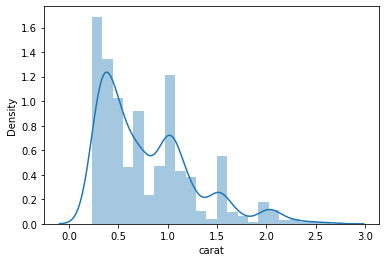

In [4]:
sns.distplot(data.carat)
plt.show()

In [8]:
stats.skew(stats.boxcox(data.carat)[0])

0.03112887846973601

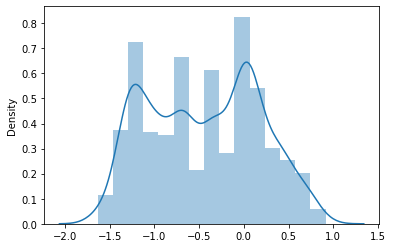

In [12]:
sns.distplot(stats.boxcox(data.carat)[0])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
X = pd.get_dummies(data.drop('price',axis=1),drop_first=True)
y = data.price

model = OLS(y,X).fit()

from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

1.9449876107423678

The errors are correlated.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
for i in data.select_dtypes(include=np.number):
    print(i,'\t:',OLS(y,pd.DataFrame(data[i])).fit().params[0])

carat 	: 5788.333242084439
depth 	: 63.7427914926157
table 	: 68.8072607353615
price 	: 1.0000000000000002
x 	: 785.0370781321518
y 	: 784.4612133151197
z 	: 1270.684023161377


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

kfold = KFold(n_splits=4,shuffle=True)
k=1
for i,j in kfold.split(X,y):
    xtrain,xtest,ytrain,ytest = X.loc[i],X.loc[j],y.loc[i],y.loc[j]
    print('Model %d R-Square'%k,':',round(r2_score(ytest,OLS(ytrain,xtrain).fit().predict(xtest)),3))
    k+=1
print()

Model 1 R-Square : 0.883
Model 2 R-Square : 0.896
Model 3 R-Square : 0.885
Model 4 R-Square : 0.893



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
X = data.select_dtypes(include=np.number).drop('price',axis=1)
y = data.price
model = OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              3699.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        22:50:23   Log-Likelihood:                         -13458.
No. Observations:                1547   AIC:                                  2.693e+04
Df Residuals:                    1541   BIC:                                  2.696e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       1.243e+04    391.534     31.755      0.000    1.17e+04    1.32e+04
depth        163.0790     19.054      8.559      0.000     125.705     200.453
table        -93.8462     17.500     -5.363      0.000    -128.172     -59.520
x          -1514.5422    714.496     -2.120      0.034   -2916.029    -113.056
y           2867.4499    673.751      4.256      0.000    1545.884    4189.016
z          -5190.6215    641.956     -8.086      0.000   -6449.821   -3931.422
==============================================================================
Omnibus:                      531.665   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5258.944
Skew:                           1.312   Prob(JB):                         0.00
Kurtosis:                      11.643   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the features are important.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
X = pd.get_dummies(data.drop('price',axis=1))
y = data.price
model = OLS(y,X).fit()
stats.shapiro(model.resid)

ShapiroResult(statistic=0.8434852361679077, pvalue=1.5090839207569356e-36)

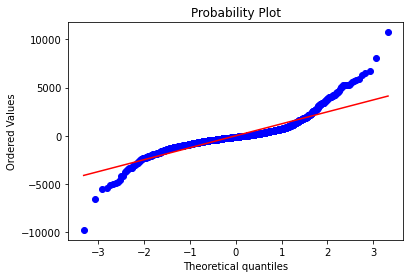

In [26]:
stats.probplot(model.resid,plot=plt)
plt.show()

The data is not normal.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

By increasing the sample size we can make the residuals normal.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
sfs = SequentialFeatureSelector(estimator=LinearRegression(),forward=True,
                                k_features=7,scoring='neg_mean_squared_error',cv=5)
model = sfs.fit(X,y)
model.k_feature_names_

('carat', 'table', 'z', 'cut_Fair', 'color_H', 'color_I', 'color_J')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:53:47   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          1.322e+04    371.464     35.601      0.000    1.25e+04     1.4e+04
depth           273.9828    131.712      2.080      0.038      15.627     532.338
table           -30.3427     20.547     -1.477      0.140     -70.646       9.961
x             -1692.0142    899.352     -1.881      0.060   -3456.108      72.080
y              3092.6570   1044.380      2.961      0.003    1044.089    5141.226
z             -5599.5209   2150.582     -2.604      0.009   -9817.921   -1381.121
cut_Fair      -6803.1304   4893.000     -1.390      0.165   -1.64e+04    2794.566
cut_Good      -6223.3501   4891.879     -1.272      0.204   -1.58e+04    3372.148
cut_Ideal     -5618.7440   4866.139     -1.155      0.248   -1.52e+04    3926.264
cut_Premium   -5875.4960   4872.529     -1.206      0.228   -1.54e+04    3682.046
cut_Very Good -5870.0415   4882.097     -1.202      0.229   -1.54e+04    3706.269
color_D       -3854.3539   3487.232     -1.105      0.269   -1.07e+04    2985.906
color_E       -3852.0928   3485.276     -1.105      0.269   -1.07e+04    2984.331
color_F       -3672.3257   3484.724     -1.054      0.292   -1.05e+04    3163.014
color_G       -3895.2884   3487.732     -1.117      0.264   -1.07e+04    2945.952
color_H       -4460.6213   3488.197     -1.279      0.201   -1.13e+04    2381.531
color_I       -4871.2081   3487.948     -1.397      0.163   -1.17e+04    1970.457
color_J       -5784.8718   3486.690     -1.659      0.097   -1.26e+04    1054.325
==============================================================================
Omnibus:                      470.401   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5833.995
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                      12.276   Cond. No.                     9.14e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression(),n_features_to_select=5)

model = rfe.fit(X,y)

li = list(model.get_feature_names_out())

model = LinearRegression().fit(X.loc[:,['carat', 'x', 'y', 'z', 'color_J']],y)
r2_score(y,model.predict(X.loc[:,['carat', 'x', 'y', 'z', 'color_J']]))


0.8812864285688169

Model is good model.